In [10]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

import csv
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import umap.umap_ as umap
from scipy.linalg import eigh as largest_eigh
import sklearn

### Figure2A: eigen, Hi-C vs bulk

### Figure2B: accuracy vs threshold

In [2]:
thresh = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]

brg = [0.7900386431945041,
 0.8018910400720396,
 0.8153773137161842,
 0.8280933062880325,
 0.8306364617044228,
 0.8346041055718475,
 0.8364336112892881,
 0.8384502923976608,
 0.8407871198568873,
 0.8253588516746412,
 0.8115942028985508]

hfc = [0.7728638900815801,
 0.7843313822602431,
 0.7982914095870907,
 0.8093306288032455,
 0.8160733549083063,
 0.819941348973607,
 0.822963438101347,
 0.8245614035087719,
 0.8237924865831843,
 0.8205741626794258,
 0.8115942028985508]

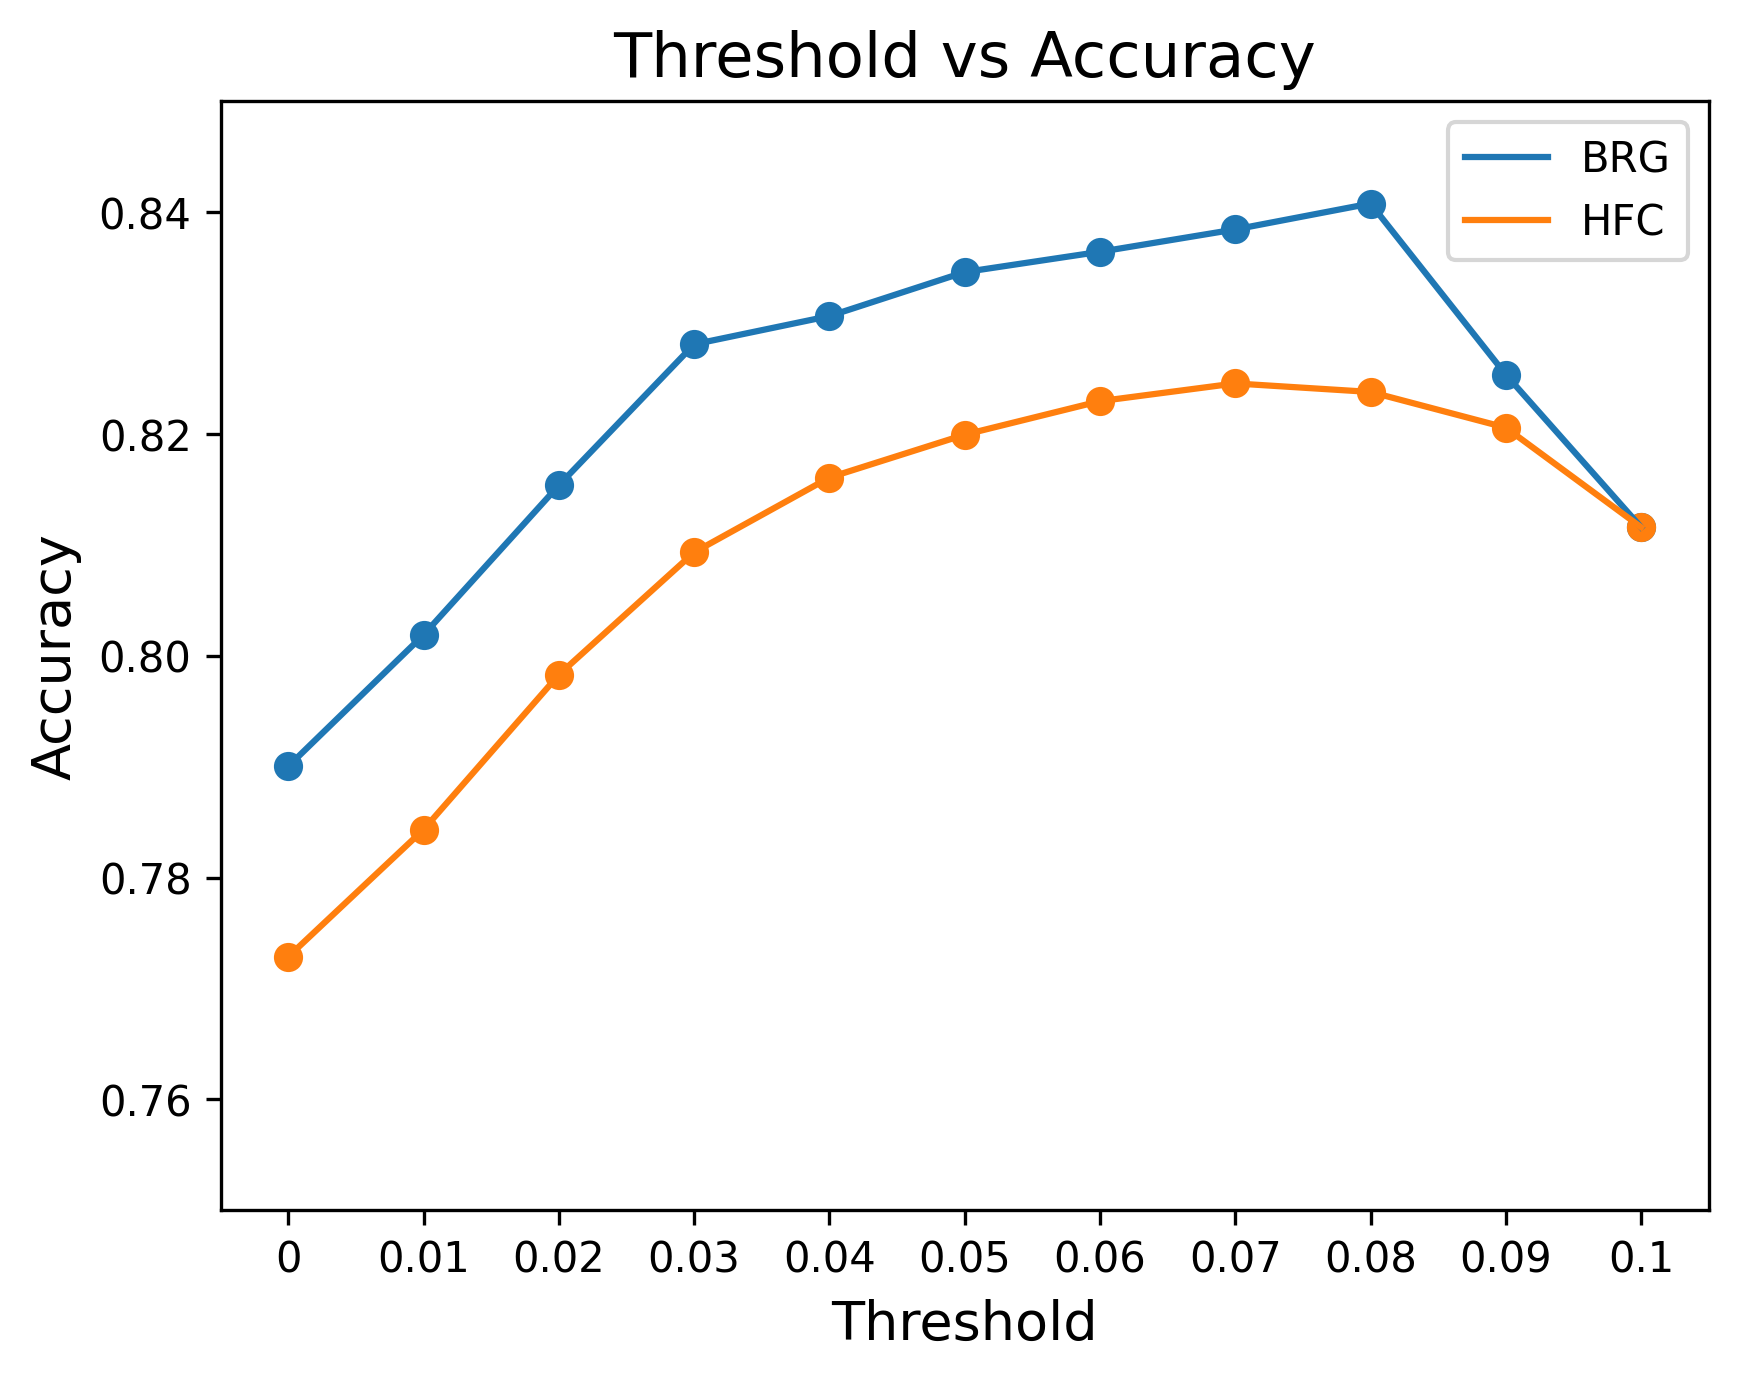

In [3]:
plt.figure(dpi=300)

plt.plot(range(11),brg)
plt.plot(range(11),hfc)

plt.scatter(range(11),brg)
plt.scatter(range(11),hfc)

plt.xticks(ticks=range(11), labels=thresh)
plt.title('Threshold vs Accuracy',size=15)
plt.xlabel("Threshold",size=13)
plt.ylabel("Accuracy",size=13)

plt.legend(['BRG','HFC'])

plt.ylim(0.75,0.85)

plt.show()


### Figure2C: H3K27AC

In [8]:
def plot_x(array1,array2,title):

    # Please change c and c2, to appropriate colors to match A/B colors in your figure
    
    fig = plt.figure(figsize=(4, 5),dpi=200)
    c = "#EE3A43"
    box1 = plt.boxplot(array1, positions=[1], patch_artist=True,
                boxprops=dict(facecolor=c, color=c),
                capprops=dict(color=c),
                whiskerprops=dict(color=c),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=c))
    plt.setp(box1["medians"], color="black")

    c2 = "#0069AA"
    box1 = plt.boxplot(array2, 
                       positions=[2],
                       patch_artist=True)

    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box1[item], color=c2)
    plt.setp(box1["boxes"], facecolor=c2)
    plt.setp(box1["medians"], color="black")
    plt.setp(box1["fliers"], markeredgecolor=c2)
    plt.xticks([1,2], [1,2])
    #plt.ylim(-0.1,1.7)
    plt.ylabel('Signal Distribution', fontsize=16)
    fig.suptitle(title, fontsize=20)
    plt.xticks([1, 2], ['A', 'B'],fontsize=16)
    plt.show()

Ttest_indResult(statistic=41.57380349083381, pvalue=8.355739442450274e-282)


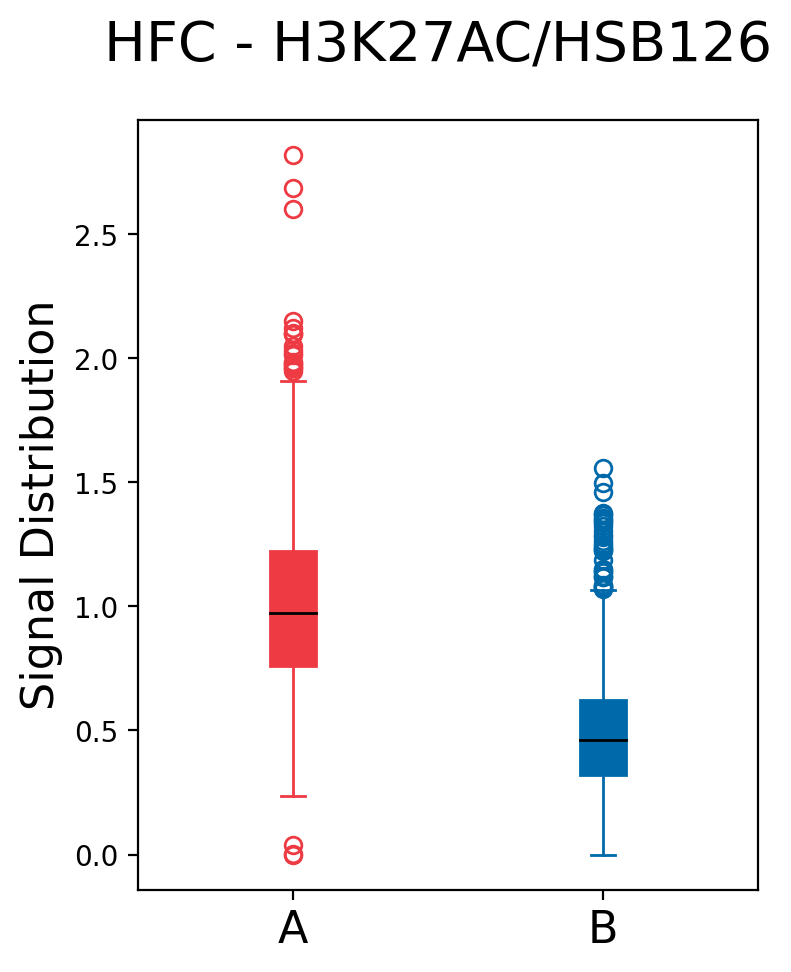

Ttest_indResult(statistic=41.0129228842538, pvalue=4.8466872944339995e-276)


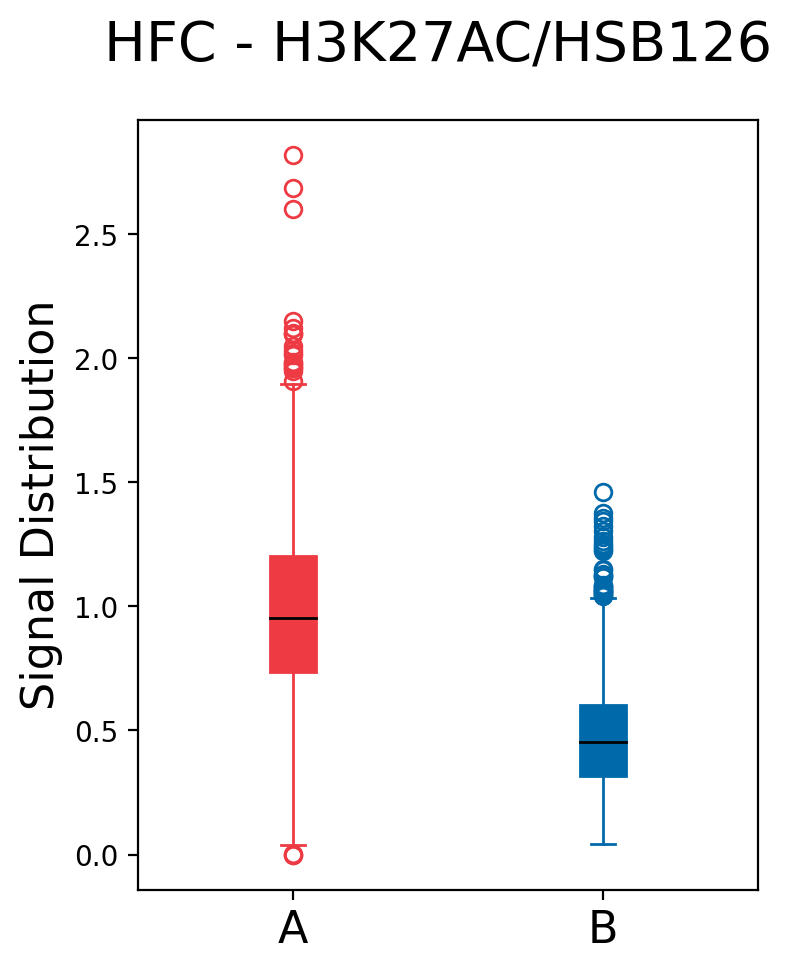

Ttest_indResult(statistic=47.35759856849225, pvalue=0.0)


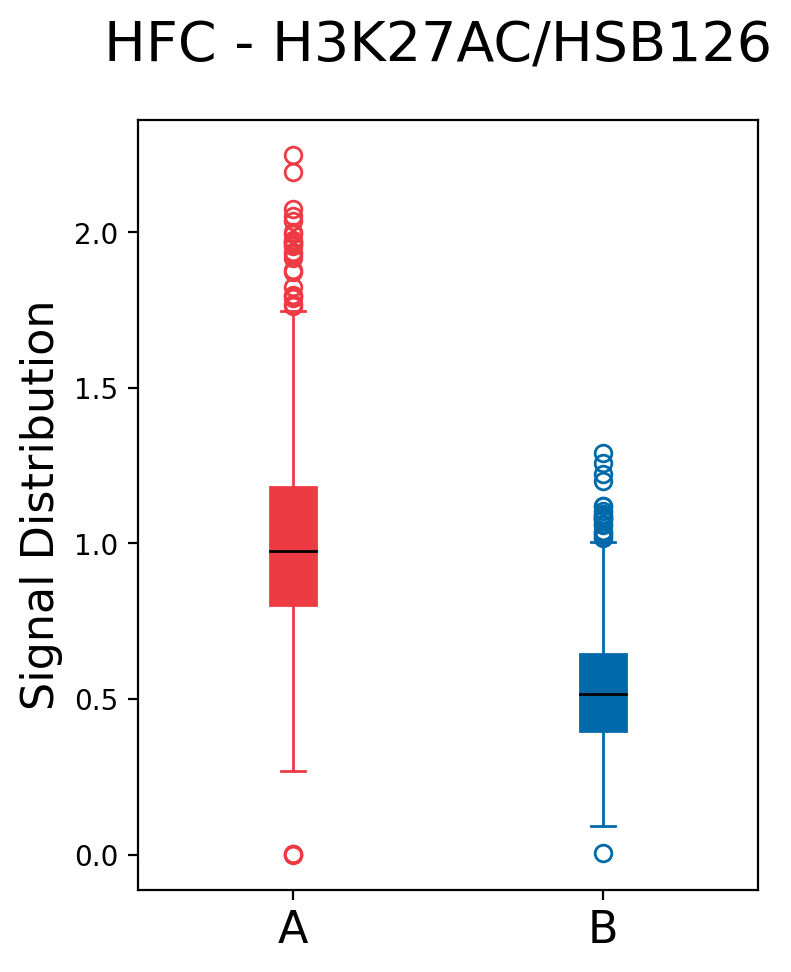

Ttest_indResult(statistic=46.3290257782154, pvalue=0.0)


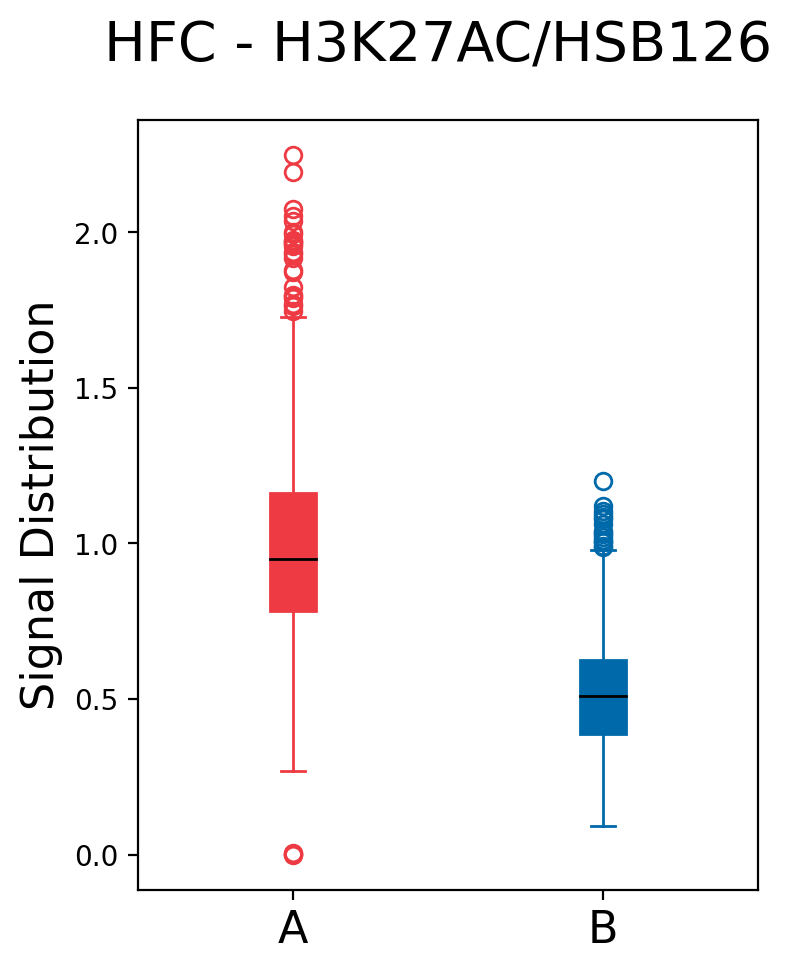

Ttest_indResult(statistic=45.99903961634538, pvalue=0.0)


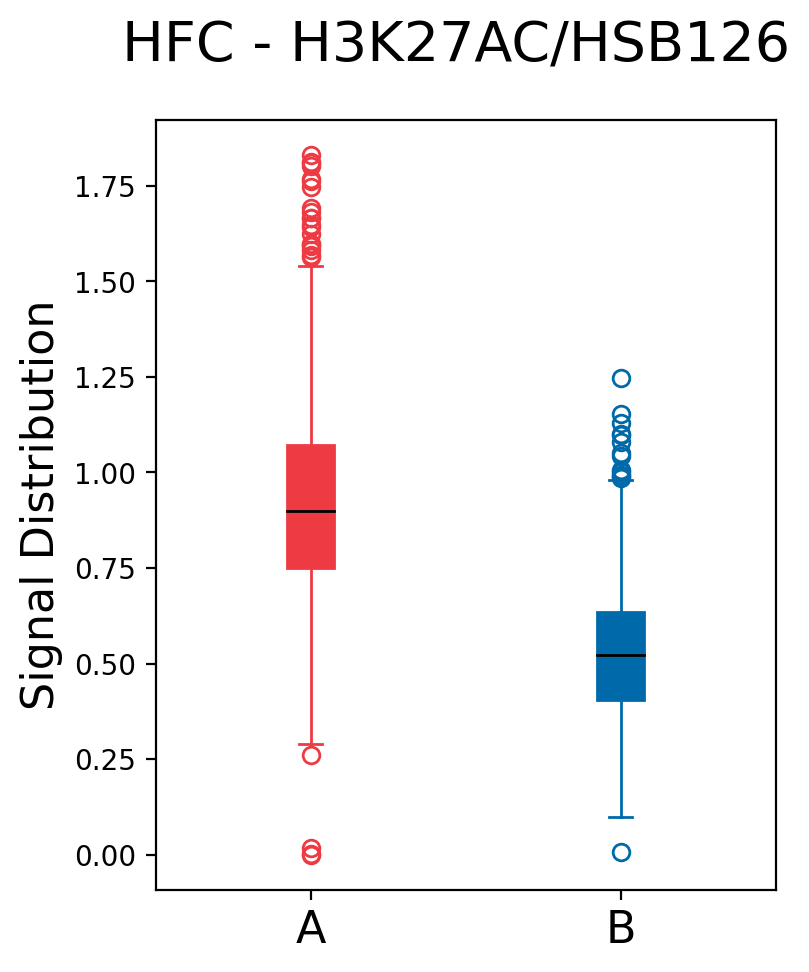

Ttest_indResult(statistic=44.59037399391597, pvalue=5.8684998357e-313)


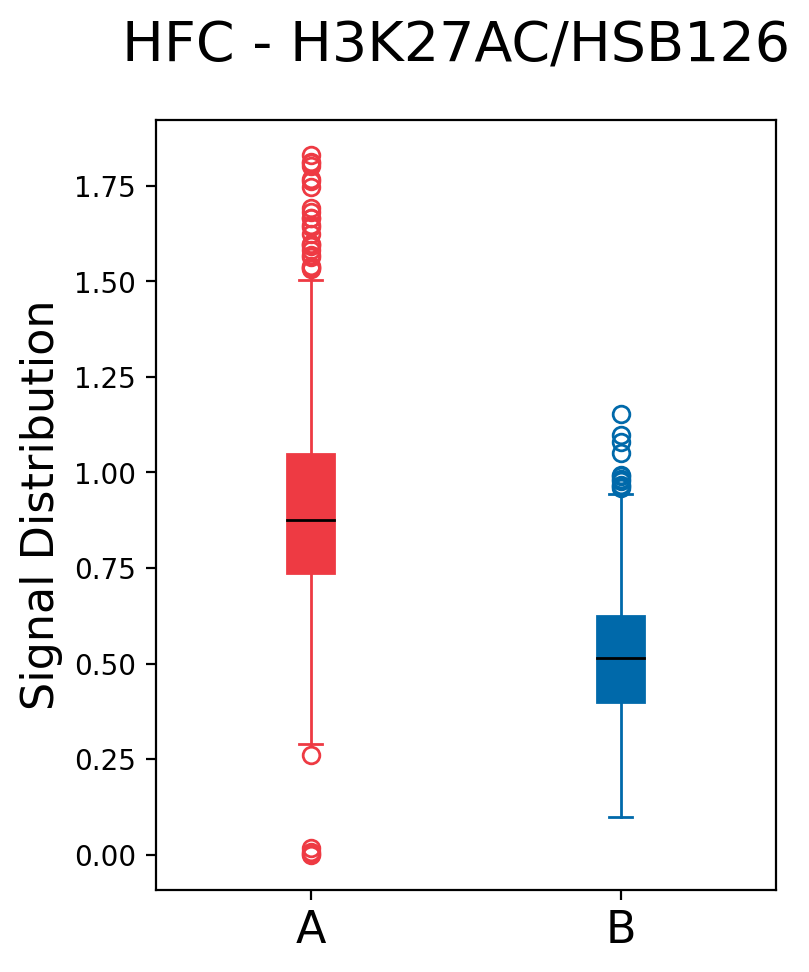

In [9]:
#### main sample ####
hsb_list = ["126","136","187"]
sample_list = ["hfc", "brg"]
for hsb in hsb_list:
    for sample in sample_list:
        A = pd.read_csv("./"+sample+"/hsb"+hsb+"/hg19_"+sample+"_B.HSB"+hsb+".tab",sep='\t', header=None) 
        B = pd.read_csv("./"+sample+"/hsb"+hsb+"/hg19_"+sample+"_A.HSB"+hsb+".tab",sep='\t', header=None)
        print(stats.ttest_ind(A[5].values, B[5].values))
        plot_x(A[5].values,B[5].values, 'HFC - H3K27AC/HSB126')

Ttest_indResult(statistic=41.57380349083381, pvalue=8.355739442450274e-282)